# DISTRICT WISE ANALYSIS - 3.8.3 and 3.8.4 (PHASE-3)

In [1]:
#Importing Libraries
!pip install pymysql

     -------------------------------------- 44.8/44.8 kB 556.9 kB/s eta 0:00:00


In [2]:
from pymysql import connect
import pandas as pd

In [3]:
data_base = connect(host = 'localhost',
                   user = 'root',
                   passwd = 'root24')

#define cursor object
cur = data_base.cursor()

#define query 
query = 'show databases'

#execute query
cur.execute(query)

#Fetch all the databases
data_bases = cur.fetchall()

for data in data_bases:
    print(data)

('bella',)
('cap_project',)
('dunder_mifflin',)
('helloworld',)
('information_schema',)
('mysql',)
('newschema',)
('performance_schema',)
('sakila',)
('sys',)
('temp1',)
('temp2',)
('world',)
('youtube_sql',)


In [5]:
#Now we navigate to the database we want
data_base = connect(host = 'localhost',
                   user = 'root',
                   passwd = 'root24',
                   database = 'cap_project')

cur = data_base.cursor()
#checking the available tables
query = 'show tables'
cur.execute(query)

#Fetch all the databases
tables = cur.fetchall()

for table in tables:
    print(table)

('district_wise_crimes_against_women_1',)
('district_wise_crimes_against_women_st_2',)
('district_wise_crimes_ipc',)


In [6]:
# define query
query = 'select * from district_wise_crimes_ipc'
cur.execute(query)

8597

In [7]:
# changing our table to pandas dataframe
district = pd.read_sql(query,data_base)

C:\Users\user\AppData\Local\Temp\ipykernel_1352\969952780.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  district = pd.read_sql(query,data_base)


In [8]:
display(district)

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT_TO_MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23
...,...,...,...,...,...,...
8592,DELHI UT,STF,2012,0,1,0
8593,DELHI UT,WEST,2012,52,37,79
8594,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0
8595,PUDUCHERRY,KARAIKAL,2012,5,6,6


In [37]:
#defining another query
query_1 = 'SELECT c1.STATE_UT , c1.DISTRICT , c1.YEAR , c1.MURDER FROM district_wise_crimes_ipc AS c1 JOIN ( SELECT STATE_UT, YEAR , MAX(MURDER) AS MaxMurders FROM district_wise_crimes_ipc GROUP BY STATE_UT, YEAR) AS c2 ON c1.STATE_UT = c2.STATE_UT AND c1.YEAR = c2.YEAR AND c1.MURDER = c2.MaxMurders;'
cur.execute(query_1)

440

In [38]:
# changing our table to pandas dataframe
district_3 = pd.read_sql(query_1,data_base)

C:\Users\user\AppData\Local\Temp\ipykernel_1352\3066825202.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  district_3 = pd.read_sql(query_1,data_base)


In [39]:
district_3

,STATE_UT,DISTRICT,YEAR,MURDER
0,ANDHRA PRADESH,RANGA REDDY,2001,214
1,ARUNACHAL PRADESH,LOHIT,2001,16
2,ASSAM,DIBRUGARH,2001,110
3,BIHAR,PATNA,2001,434
4,CHHATTISGARH,SARGUJA,2001,105
...,...,...,...,...
435,D & N HAVELI,D and N HAVELI,2012,7
436,DAMAN & DIU,DAMAN,2012,3
437,DELHI UT,OUTER,2012,96
438,LAKSHADWEEP,LAKSHADWEEP,2012,0


In [79]:
#Converting the dtype of year into object or str type
district_3['YEAR'] = district_3['YEAR'].astype('str')

In [80]:
district_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   STATE_UT  440 non-null    object
 1   DISTRICT  440 non-null    object
 2   YEAR      440 non-null    object
 3   MURDER    440 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.9+ KB


In [81]:
cat_col = []
for i in district_2.dtypes.index:
    if district_2.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['STATE_UT', 'DISTRICT']


In [82]:
#Andhra Pradesh
andhra = district_3[district_3["STATE_UT"] == 'ANDHRA PRADESH']
andhra

,STATE_UT,DISTRICT,YEAR,MURDER
0,ANDHRA PRADESH,RANGA REDDY,2001,214
36,ANDHRA PRADESH,RANGA REDDY,2002,214
72,ANDHRA PRADESH,GUNTUR,2003,210
108,ANDHRA PRADESH,MAHABOOBNAGAR,2004,183
145,ANDHRA PRADESH,MAHABOOBNAGAR,2005,212
184,ANDHRA PRADESH,CYBERABAD,2006,193
222,ANDHRA PRADESH,CYBERABAD,2007,186
258,ANDHRA PRADESH,CYBERABAD,2008,197
297,ANDHRA PRADESH,CYBERABAD,2009,186
333,ANDHRA PRADESH,CYBERABAD,2010,187


-- As we can see from the above data, we see that the district 'CYBERABAD' in the state of 'ANDHRA PRADESH' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

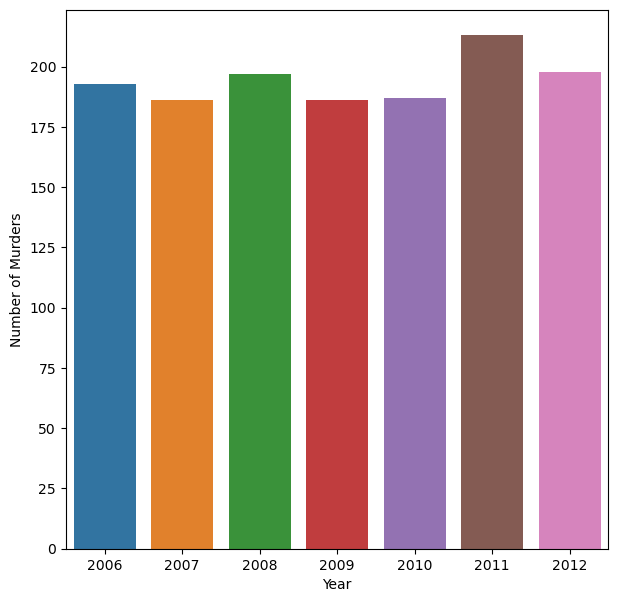

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
a = andhra[andhra["DISTRICT"] == 'CYBERABAD']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = a,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

-- As we see from the above graph, the district 'CYBERABAD' has to undergo some action because the murder rate keeps increasing or remains constant but never decreases.

In [41]:
#Arunachal Pradesh
ap = district_3[district_3["STATE_UT"] == 'ARUNACHAL PRADESH']
ap

,STATE_UT,DISTRICT,YEAR,MURDER
1,ARUNACHAL PRADESH,LOHIT,2001,16
37,ARUNACHAL PRADESH,LOHIT,2002,14
73,ARUNACHAL PRADESH,LOHIT,2003,16
109,ARUNACHAL PRADESH,LOHIT,2004,10
110,ARUNACHAL PRADESH,SUBANSIRI UPPER,2004,10
146,ARUNACHAL PRADESH,LOHIT,2005,14
185,ARUNACHAL PRADESH,PAPUM PARE,2006,10
223,ARUNACHAL PRADESH,LOHIT,2007,17
259,ARUNACHAL PRADESH,LOHIT,2008,11
260,ARUNACHAL PRADESH,PAPUM PARE,2008,11


-- As we can see from the above data, we see that the district 'LOHIT' in the state of 'ARUNACHAL PRADESH' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

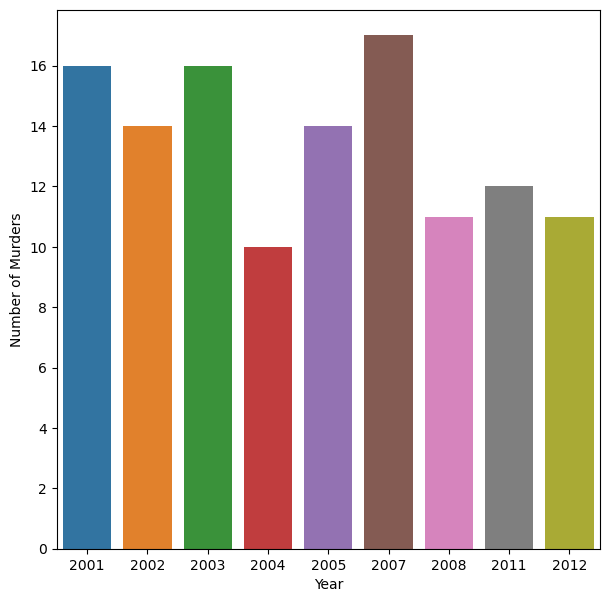

In [88]:
b = ap[ap["DISTRICT"] == 'LOHIT']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = b,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

-- The murder rate keeps decreasing in this district, so it is a good sign.

In [42]:
#Assam
assam = district_3[district_3["STATE_UT"] == 'ASSAM']
assam

,STATE_UT,DISTRICT,YEAR,MURDER
2,ASSAM,DIBRUGARH,2001,110
38,ASSAM,TINSUKIA,2002,115
74,ASSAM,DIBRUGARH,2003,107
111,ASSAM,DIBRUGARH,2004,125
147,ASSAM,DIBRUGARH,2005,113
186,ASSAM,DIBRUGARH,2006,104
224,ASSAM,TINSUKIA,2007,143
261,ASSAM,TINSUKIA,2008,114
299,ASSAM,SONITPUR,2009,109
335,ASSAM,TINSUKIA,2010,96


As we can see from the above data, we see that the districts 'DIBRUGARH' and 'TINSUKIA' in the state of 'ASSAM' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

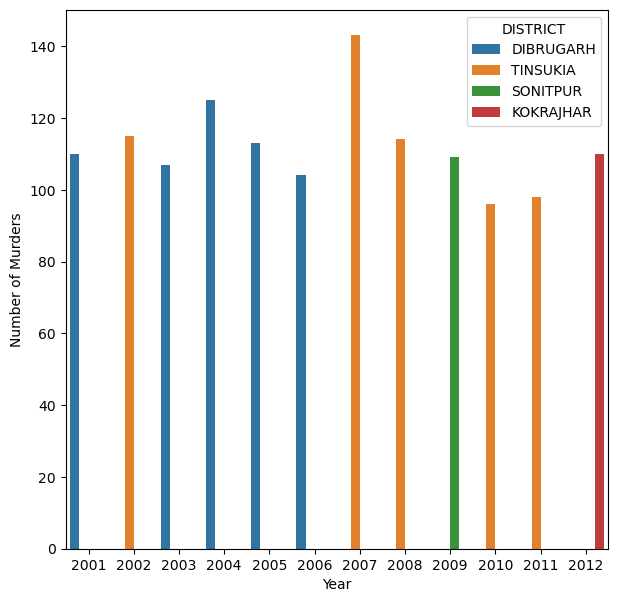

In [89]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = assam,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

-- As we can see from the graph, the district 'DIBRUGARH' needs some action to be taken as the number of murders seems to not decrease but stay constant but in the other district 'TINSUKIA' the number keeps decreasing.

In [43]:
#Bihar
bihar = district_3[district_3["STATE_UT"] == 'BIHAR']
bihar

,STATE_UT,DISTRICT,YEAR,MURDER
3,BIHAR,PATNA,2001,434
39,BIHAR,PATNA,2002,472
75,BIHAR,PATNA,2003,484
112,BIHAR,PATNA,2004,542
148,BIHAR,PATNA,2005,436
187,BIHAR,PATNA,2006,338
225,BIHAR,PATNA,2007,317
262,BIHAR,PATNA,2008,341
300,BIHAR,PATNA,2009,314
336,BIHAR,PATNA,2010,304


As we can see from the above data, we see that the district 'PATNA' in the state of 'BIHAR' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

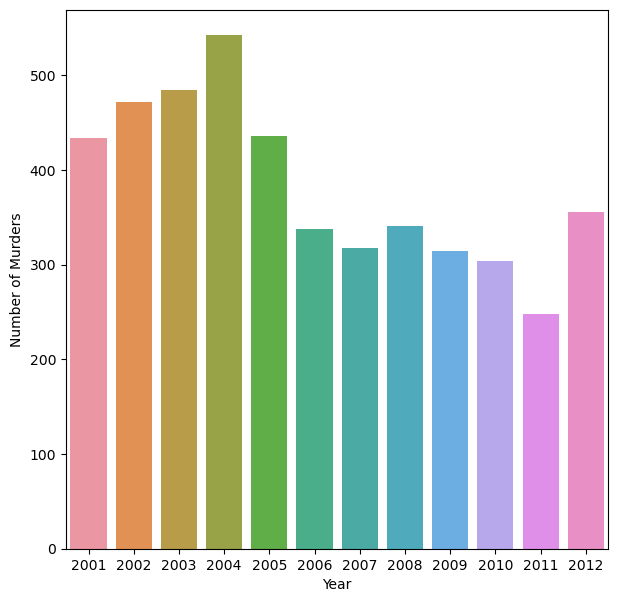

In [90]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = bihar,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

-- The murder rate keeps decreasing in the district 'PATNA' which is a good sign, but action has to be taken as the number is too high.

In [45]:
#Chhattisgarh
cg = district_3[district_3["STATE_UT"] == 'CHHATTISGARH']
cg

,STATE_UT,DISTRICT,YEAR,MURDER
4,CHHATTISGARH,SARGUJA,2001,105
40,CHHATTISGARH,SARGUJA,2002,101
76,CHHATTISGARH,BILASPUR,2003,95
113,CHHATTISGARH,SARGUJA,2004,111
149,CHHATTISGARH,BILASPUR,2005,94
188,CHHATTISGARH,BIZAPUR,2006,139
226,CHHATTISGARH,BIZAPUR,2007,113
263,CHHATTISGARH,BILASPUR,2008,112
264,CHHATTISGARH,RAIPUR,2008,112
301,CHHATTISGARH,RAIPUR,2009,101


As we can see from the above data, we see that the district 'BILASPUR' in the state of 'CHHATTISGARH' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

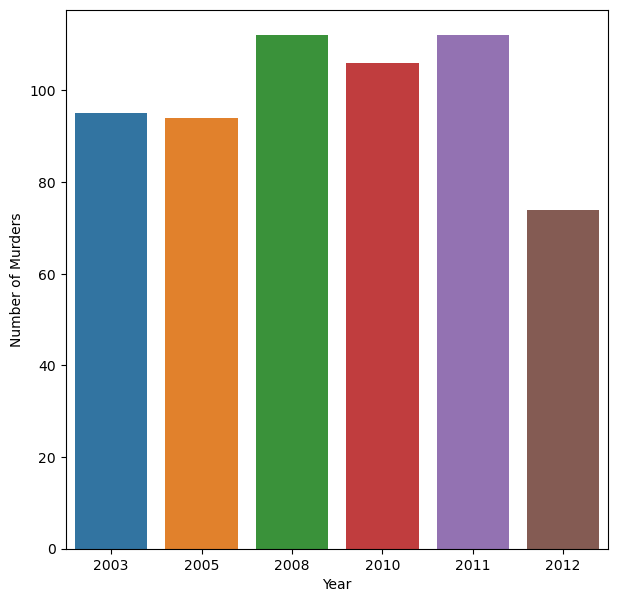

In [91]:
c = cg[cg["DISTRICT"] == 'BILASPUR']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = c,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [46]:
#GOA
goa = district_3[district_3["STATE_UT"] == 'GOA']
goa

,STATE_UT,DISTRICT,YEAR,MURDER
5,GOA,NORTH GOA,2001,22
41,GOA,NORTH GOA,2002,18
77,GOA,NORTH GOA,2003,22
114,GOA,NORTH GOA,2004,23
150,GOA,SOUTH GOA,2005,23
189,GOA,NORTH GOA,2006,24
227,GOA,SOUTH GOA,2007,18
265,GOA,NORTH GOA,2008,26
302,GOA,NORTH GOA,2009,33
338,GOA,NORTH GOA,2010,25


As we can see from the above data, we see that the district 'NORTH GOA' in the state of 'GOA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

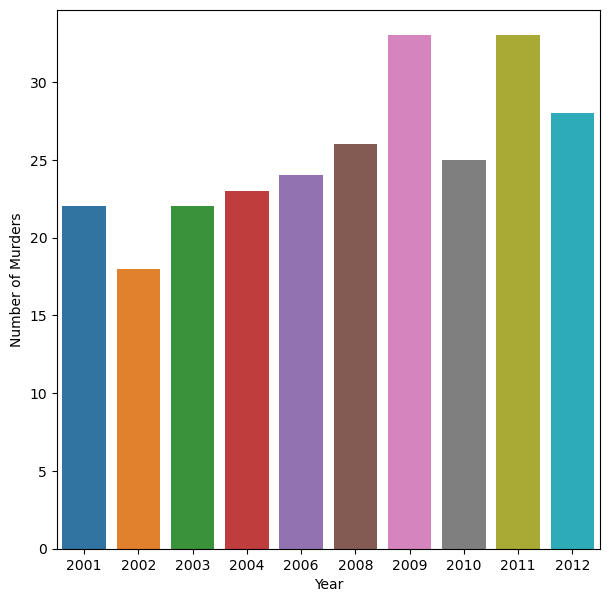

In [92]:
d = goa[goa["DISTRICT"] == 'NORTH GOA']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = d,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

-- As we can see from the above graph, there is a slight increase in the murder rate in this district.

In [48]:
#gujarat
gujarat = district_3[district_3["STATE_UT"] == 'GUJARAT']
gujarat

,STATE_UT,DISTRICT,YEAR,MURDER
6,GUJARAT,SURAT COMMR.,2001,98
42,GUJARAT,AHMEDABAD COMMR.,2002,222
78,GUJARAT,AHMEDABAD COMMR.,2003,90
115,GUJARAT,AHMEDABAD COMMR.,2004,92
151,GUJARAT,SURAT COMMR.,2005,86
190,GUJARAT,SURAT COMMR.,2006,103
228,GUJARAT,SURAT COMMR.,2007,108
266,GUJARAT,SURAT COMMR.,2008,97
303,GUJARAT,SURAT COMMR.,2009,101
339,GUJARAT,SURAT COMMR.,2010,87


As we can see from the above data, we see that the district 'SURAT COMMR.' in the state of 'GUJARAT' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

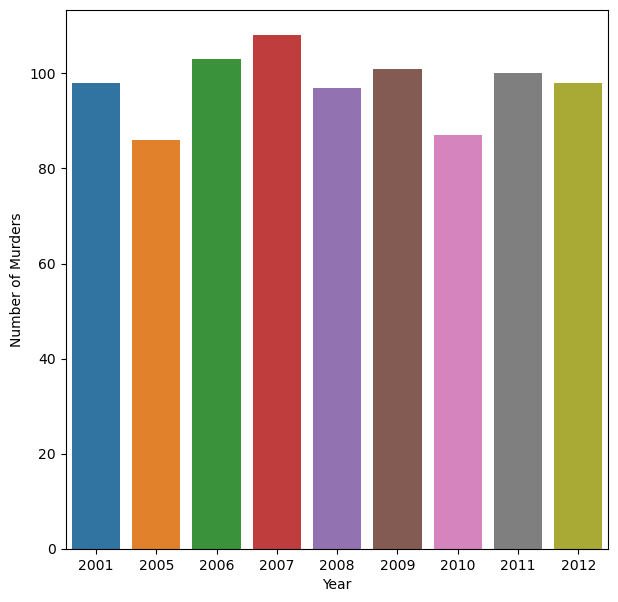

In [94]:
e = gujarat[gujarat["DISTRICT"] == 'SURAT COMMR.']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = e,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [50]:
#harayana
haryana = district_3[district_3["STATE_UT"] == 'HARYANA']
haryana

,STATE_UT,DISTRICT,YEAR,MURDER
7,HARYANA,SONIPAT,2001,73
43,HARYANA,SONIPAT,2002,82
79,HARYANA,GURGAON,2003,62
80,HARYANA,SONIPAT,2003,62
116,HARYANA,FARIDABAD,2004,67
117,HARYANA,SONIPAT,2004,67
152,HARYANA,FARIDABAD,2005,76
191,HARYANA,GURGAON,2006,93
229,HARYANA,GURGAON,2007,93
267,HARYANA,SONIPAT,2008,84


As we can see from the above data, we see that the districts 'SONIPAT' and 'GURGAON' in the state of 'HARYANA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

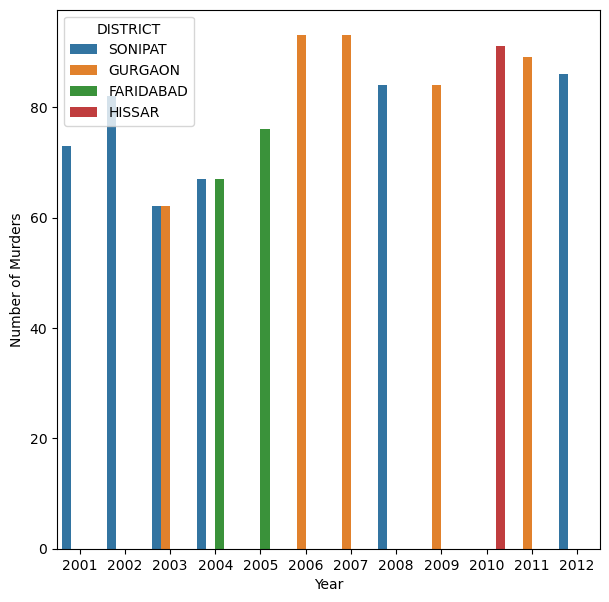

In [95]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = haryana,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [51]:
#Himachal Pradesh
hp = district_3[district_3["STATE_UT"] == 'HIMACHAL PRADESH']
hp

,STATE_UT,DISTRICT,YEAR,MURDER
8,HIMACHAL PRADESH,KANGRA,2001,24
44,HIMACHAL PRADESH,KANGRA,2002,28
81,HIMACHAL PRADESH,KANGRA,2003,38
118,HIMACHAL PRADESH,MANDI,2004,19
153,HIMACHAL PRADESH,KANGRA,2005,21
192,HIMACHAL PRADESH,KANGRA,2006,19
230,HIMACHAL PRADESH,KANGRA,2007,22
268,HIMACHAL PRADESH,KANGRA,2008,19
269,HIMACHAL PRADESH,MANDI,2008,19
305,HIMACHAL PRADESH,KANGRA,2009,29


As we can see from the above data, we see that the district 'KANGRA' in the state of 'HIMACHAL PRADESH' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

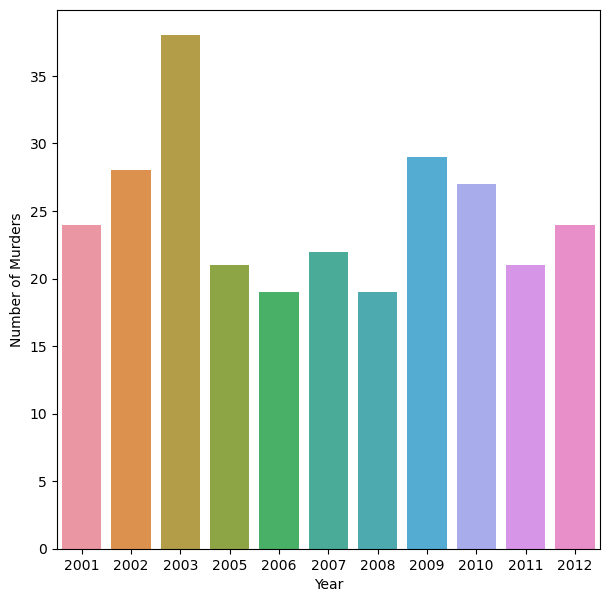

In [96]:
f = hp[hp["DISTRICT"] == 'KANGRA']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = f,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [52]:
#Jammu and Kashmir
jk = district_3[district_3["STATE_UT"] == 'JAMMU & KASHMIR']
jk

,STATE_UT,DISTRICT,YEAR,MURDER
9,JAMMU & KASHMIR,BARAMULLA,2001,144
45,JAMMU & KASHMIR,BARAMULLA,2002,121
82,JAMMU & KASHMIR,POONCH,2003,111
119,JAMMU & KASHMIR,BARAMULLA,2004,86
154,JAMMU & KASHMIR,BARAMULLA,2005,78
193,JAMMU & KASHMIR,DODA,2006,65
231,JAMMU & KASHMIR,BARAMULLA,2007,47
270,JAMMU & KASHMIR,JAMMU,2008,31
306,JAMMU & KASHMIR,SRINAGAR,2009,23
342,JAMMU & KASHMIR,SOPORE,2010,30


As we can see from the above data, we see that the districts 'BARAMULLA' and 'JAMMU' in the state of 'JAMMU AND KASHMIR' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

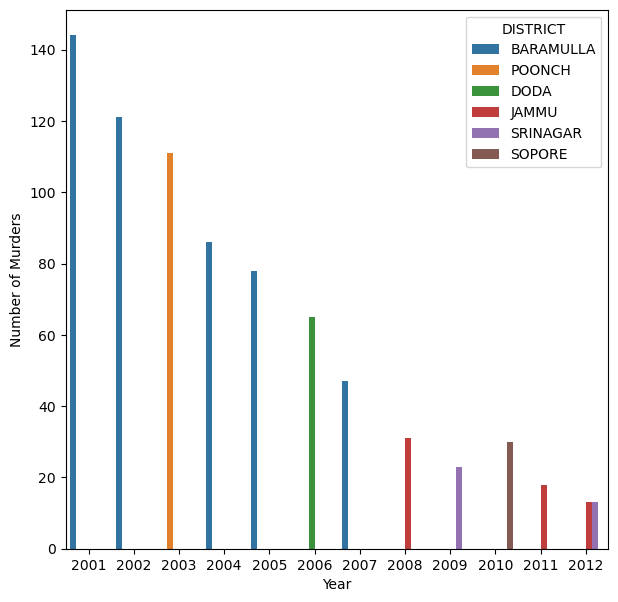

In [97]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = jk,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [53]:
#Jharkhand
jharkhand = district_3[district_3["STATE_UT"] == 'JHARKHAND']
jharkhand

,STATE_UT,DISTRICT,YEAR,MURDER
10,JHARKHAND,RANCHI,2001,243
46,JHARKHAND,RANCHI,2002,270
83,JHARKHAND,RANCHI,2003,250
120,JHARKHAND,RANCHI,2004,270
155,JHARKHAND,RANCHI,2005,239
194,JHARKHAND,RANCHI,2006,253
232,JHARKHAND,RANCHI,2007,203
271,JHARKHAND,RANCHI,2008,209
307,JHARKHAND,RANCHI,2009,202
343,JHARKHAND,RANCHI,2010,183


As we can see from the above data, we see that the district 'RANCHI' in the state of 'JHARKHAND' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

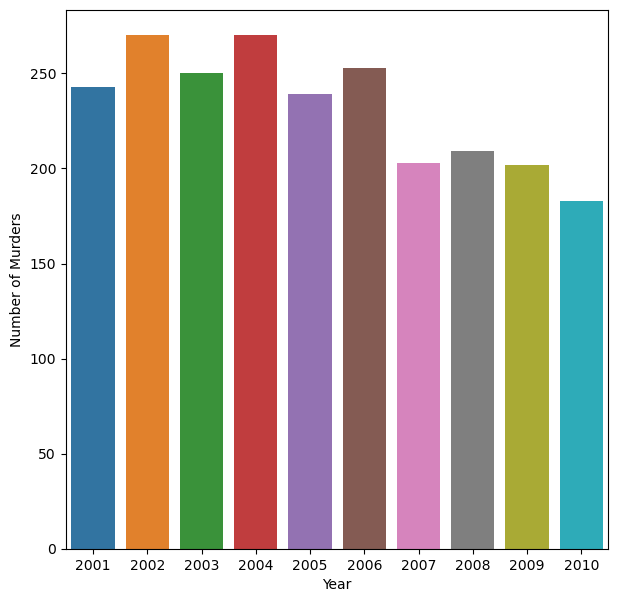

In [98]:
g = jharkhand[jharkhand["DISTRICT"] == 'RANCHI']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = g,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [54]:
#Karnataka
ka = district_3[district_3["STATE_UT"] == 'KARNATAKA']
ka

,STATE_UT,DISTRICT,YEAR,MURDER
11,KARNATAKA,BANGALORE COMMR.,2001,221
47,KARNATAKA,BANGALORE COMMR.,2002,201
84,KARNATAKA,BANGALORE COMMR.,2003,216
121,KARNATAKA,BANGALORE COMMR.,2004,214
156,KARNATAKA,BANGALORE COMMR.,2005,242
195,KARNATAKA,BANGALORE COMMR.,2006,218
233,KARNATAKA,BANGALORE COMMR.,2007,246
272,KARNATAKA,BANGALORE COMMR.,2008,253
308,KARNATAKA,BANGALORE COMMR.,2009,256
344,KARNATAKA,BANGALORE COMMR.,2010,266


As we can see from the above data, we see that the district 'BANGALORE COMMR.' in the state of 'KARNATAKA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

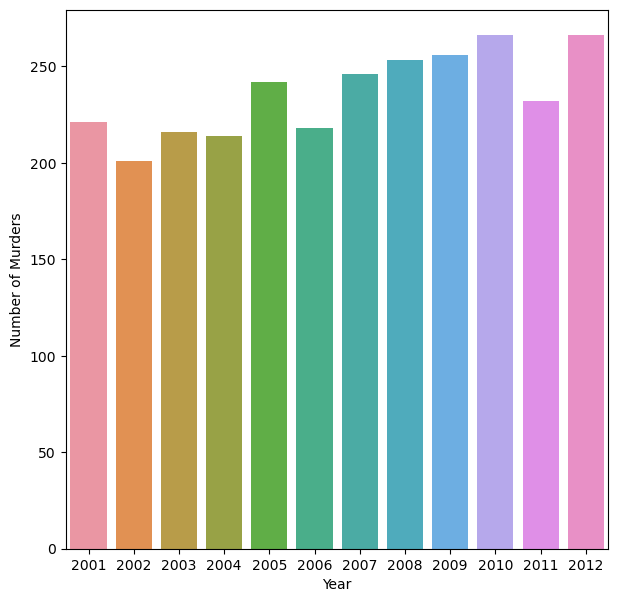

In [100]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = ka,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [55]:
#Kerala
kerala = district_3[district_3["STATE_UT"] == 'KERALA']
kerala

,STATE_UT,DISTRICT,YEAR,MURDER
12,KERALA,TRIVANDRUM,2001,53
48,KERALA,TRIVANDRUM,2002,58
85,KERALA,PALAKKAD,2003,52
122,KERALA,KOLLAM,2004,46
157,KERALA,THRISSUR,2005,41
196,KERALA,PALAKKAD,2006,44
197,KERALA,THRISSUR,2006,44
234,KERALA,KOLLAM,2007,43
273,KERALA,THRISSUR,2008,38
309,KERALA,PALAKKAD,2009,36


As we can see from the above data, we see that the district 'PALAKKAD' in the state of 'KERALA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

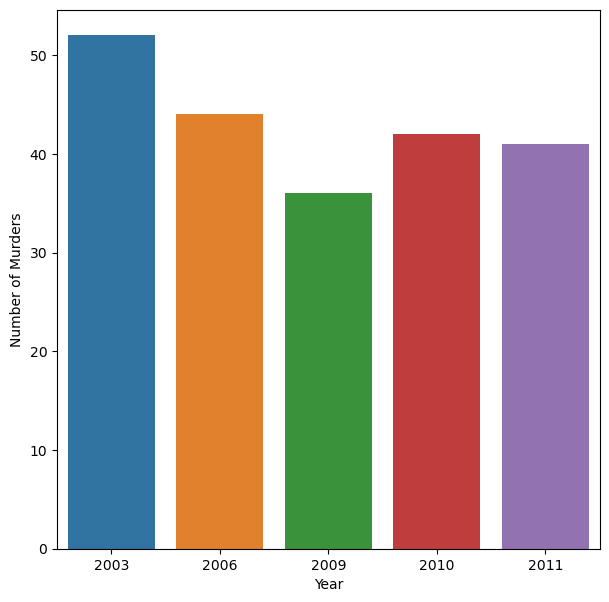

In [101]:
h = kerala[kerala["DISTRICT"] == 'PALAKKAD']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = h,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [56]:
#Madhya Pradesh
mp = district_3[district_3["STATE_UT"] == 'MADHYA PRADESH']
mp

,STATE_UT,DISTRICT,YEAR,MURDER
13,MADHYA PRADESH,JHABUA,2001,124
49,MADHYA PRADESH,JHABUA,2002,133
86,MADHYA PRADESH,JHABUA,2003,119
123,MADHYA PRADESH,JHABUA,2004,139
158,MADHYA PRADESH,JHABUA,2005,129
198,MADHYA PRADESH,JHABUA,2006,117
235,MADHYA PRADESH,INDORE,2007,111
274,MADHYA PRADESH,INDORE,2008,125
310,MADHYA PRADESH,INDORE,2009,132
347,MADHYA PRADESH,INDORE,2010,108


As we can see from the above data, we see that the districts 'INDORE' and 'JHABUA' in the state of 'MADHYA PRADESH' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

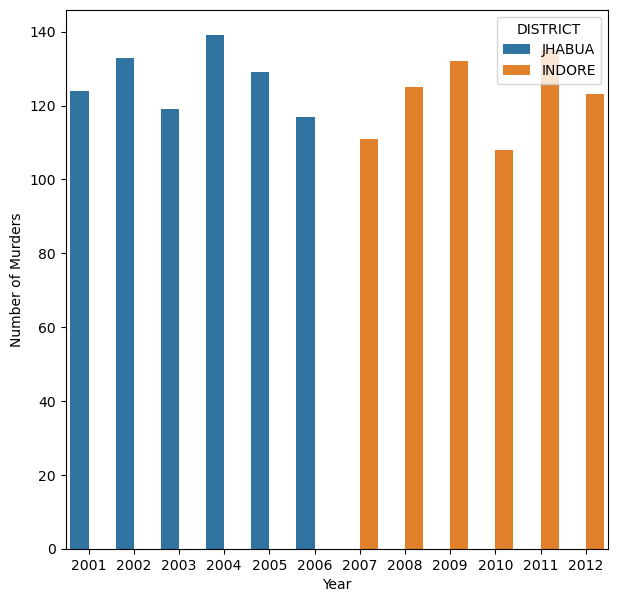

In [102]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = mp,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [57]:
#Maharashtra
mh = district_3[district_3["STATE_UT"] == 'MAHARASHTRA']
mh

,STATE_UT,DISTRICT,YEAR,MURDER
14,MAHARASHTRA,MUMBAI,2001,295
50,MAHARASHTRA,MUMBAI,2002,252
87,MAHARASHTRA,MUMBAI,2003,242
124,MAHARASHTRA,MUMBAI,2004,253
159,MAHARASHTRA,MUMBAI,2005,212
199,MAHARASHTRA,MUMBAI COMMR.,2006,239
236,MAHARASHTRA,MUMBAI COMMR.,2007,230
275,MAHARASHTRA,MUMBAI COMMR.,2008,210
311,MAHARASHTRA,MUMBAI COMMR.,2009,217
348,MAHARASHTRA,MUMBAI COMMR.,2010,228


As we can see from the above data, we see that the districts 'MUMBAI' and 'MUMBAI COMMR' in the state of 'MAHARASHTRA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

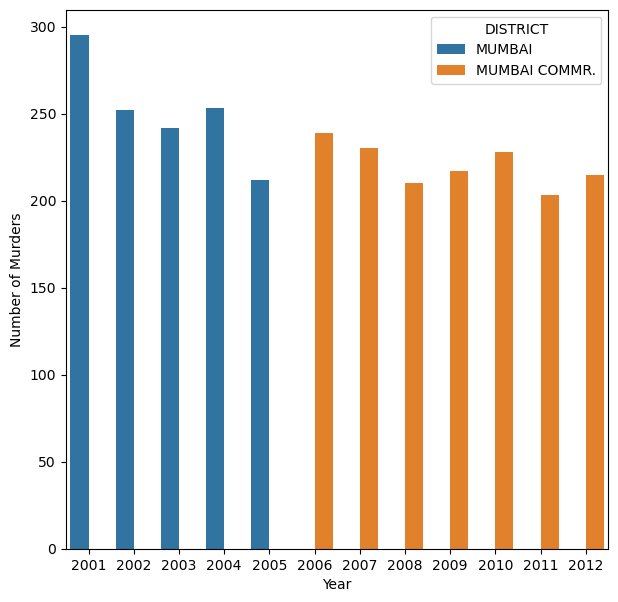

In [103]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = mh,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [58]:
#Manipur
manipur = district_3[district_3["STATE_UT"] == 'MANIPUR']
manipur

,STATE_UT,DISTRICT,YEAR,MURDER
15,MANIPUR,IMPHAL(WEST),2001,44
51,MANIPUR,IMPHAL(WEST),2002,32
88,MANIPUR,IMPHAL(WEST),2003,28
125,MANIPUR,THOUBAL,2004,38
160,MANIPUR,CHURACHANDPUR,2005,49
161,MANIPUR,IMPHAL(WEST),2005,49
200,MANIPUR,CHURACHANDPUR,2006,43
237,MANIPUR,IMPHAL WEST,2007,61
276,MANIPUR,THOUBAL,2008,46
312,MANIPUR,IMPHAL WEST,2009,32


As we can see from the above data, we see that the district 'IMPHAL WEST' in the state of 'MANIPUR' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

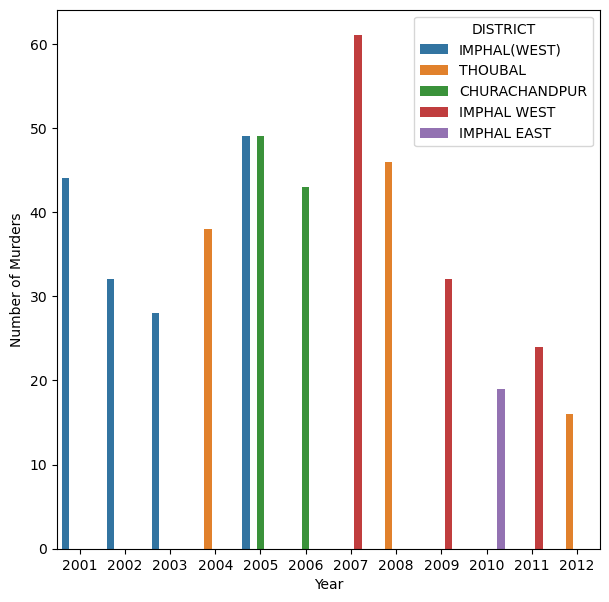

In [104]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = manipur,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [59]:
#Meghalaya
meghalaya = district_3[district_3["STATE_UT"] == 'MEGHALAYA']
meghalaya

,STATE_UT,DISTRICT,YEAR,MURDER
16,MEGHALAYA,KHASI HILLS EAST,2001,50
52,MEGHALAYA,KHASI HILLS EAST,2002,48
89,MEGHALAYA,JAINTIA HILLS,2003,52
126,MEGHALAYA,KHASI HILLS EAST,2004,33
162,MEGHALAYA,JAINTIA HILLS,2005,43
201,MEGHALAYA,JAINTIA HILLS,2006,51
238,MEGHALAYA,JAINTIA HILLS,2007,43
277,MEGHALAYA,JAINTIA HILLS,2008,38
313,MEGHALAYA,JAINTIA HILLS,2009,40
350,MEGHALAYA,JAINTIA HILLS,2010,48


As we can see from the above data, we see that the district 'JAINTIA HILLS' in the state of 'MEGHALAYA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

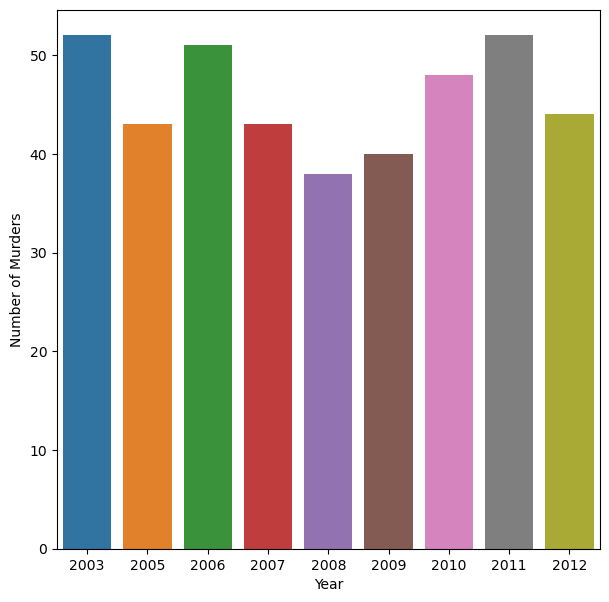

In [105]:
g = meghalaya[meghalaya["DISTRICT"] == 'JAINTIA HILLS']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = g,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [60]:
#Mizoram
mizoram = district_3[district_3["STATE_UT"] == 'MIZORAM']
mizoram

,STATE_UT,DISTRICT,YEAR,MURDER
17,MIZORAM,AIZAWL,2001,12
53,MIZORAM,CHAMPHAI,2002,6
54,MIZORAM,SERCHHIP,2002,6
90,MIZORAM,AIZAWL,2003,14
127,MIZORAM,AIZAWL,2004,10
163,MIZORAM,AIZAWL,2005,4
164,MIZORAM,CHAMPHAI,2005,4
165,MIZORAM,LUNGLEI,2005,4
166,MIZORAM,MAMIT,2005,4
202,MIZORAM,AIZAWL,2006,7


As we can see from the above data, we see that the district 'AIZAWL' in the state of 'MIZORAM' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

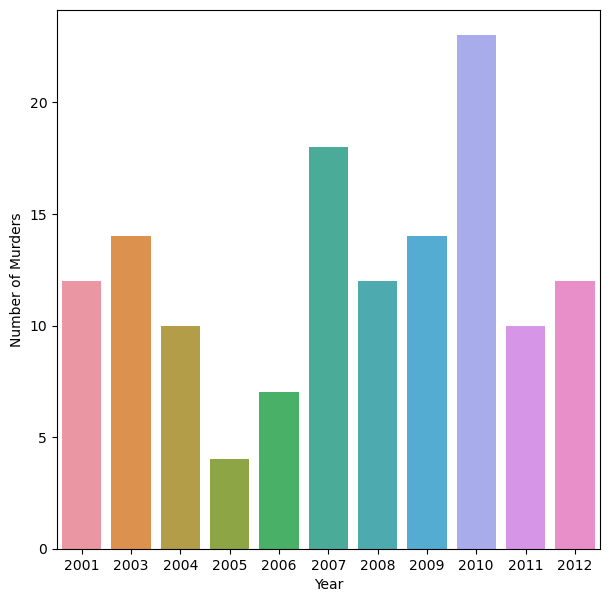

In [106]:
i = mizoram[mizoram["DISTRICT"] == 'AIZAWL']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = i,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [61]:
#nagaland
nagaland = district_3[district_3["STATE_UT"] == 'NAGALAND']
nagaland

,STATE_UT,DISTRICT,YEAR,MURDER
18,NAGALAND,DIMAPUR,2001,36
55,NAGALAND,DIMAPUR,2002,32
91,NAGALAND,KOHIMA,2003,28
128,NAGALAND,DIMAPUR,2004,22
167,NAGALAND,DIMAPUR,2005,23
203,NAGALAND,KOHIMA,2006,31
240,NAGALAND,DIMAPUR,2007,30
279,NAGALAND,DIMAPUR,2008,64
315,NAGALAND,DIMAPUR,2009,15
352,NAGALAND,DIMAPUR,2010,20


As we can see from the above data, we see that the district 'DIMAPUR' in the state of 'NAGALAND' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

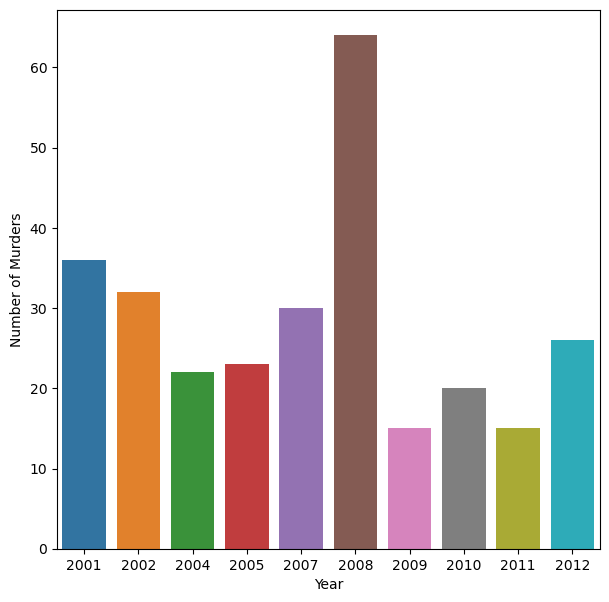

In [107]:
j = nagaland[nagaland["DISTRICT"] == 'DIMAPUR']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = j,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [62]:
#Odisha
odisha = district_3[district_3["STATE_UT"] == 'ODISHA']
odisha

,STATE_UT,DISTRICT,YEAR,MURDER
19,ODISHA,MAYURBHANJ,2001,74
56,ODISHA,SUNDARGARH,2002,87
92,ODISHA,SUNDARGARH,2003,83
129,ODISHA,MAYURBHANJ,2004,77
168,ODISHA,SUNDARGARH,2005,82
204,ODISHA,KEONJHAR,2006,84
205,ODISHA,MAYURBHANJ,2006,84
241,ODISHA,MAYURBHANJ,2007,98
280,ODISHA,KEONJHAR,2008,91
316,ODISHA,KEONJHAR,2009,109


As we can see from the above data, we see that the district 'MAYURBHANJ' in the state of 'ODISHA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

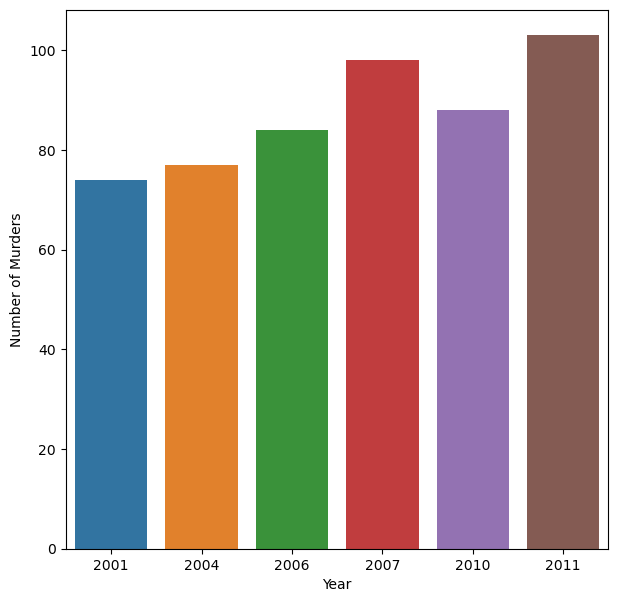

In [108]:
k = odisha[odisha["DISTRICT"] == 'MAYURBHANJ']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = k,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [63]:
#Punjab
punjab = district_3[district_3["STATE_UT"] == 'PUNJAB']
punjab

,STATE_UT,DISTRICT,YEAR,MURDER
20,PUNJAB,JALANDHAR,2001,74
21,PUNJAB,LUDHIANA,2001,74
57,PUNJAB,LUDHIANA,2002,68
93,PUNJAB,LUDHIANA,2003,64
130,PUNJAB,JALANDHAR,2004,74
169,PUNJAB,JALANDHAR,2005,63
206,PUNJAB,JALANDHAR,2006,80
242,PUNJAB,JALANDHAR,2007,63
243,PUNJAB,LUDHIANA,2007,63
281,PUNJAB,LUDHIANA,2008,73


As we can see from the above data, we see that the districts 'LUDHIANA' and 'JALANDHAR' in the state of 'PUNJAB' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

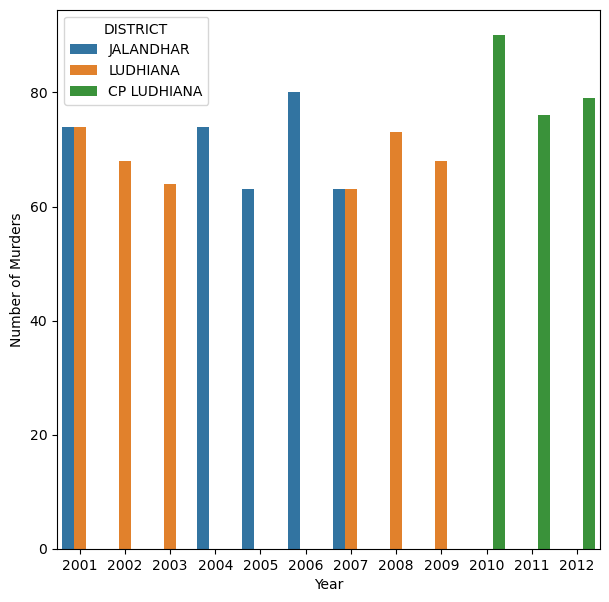

In [109]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = punjab,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [64]:
#Rajasthan
rajasthan = district_3[district_3["STATE_UT"] == 'RAJASTHAN']
rajasthan

,STATE_UT,DISTRICT,YEAR,MURDER
22,RAJASTHAN,JAIPUR,2001,91
58,RAJASTHAN,BHARATPUR,2002,87
94,RAJASTHAN,JAIPUR,2003,92
131,RAJASTHAN,BHARATPUR,2004,92
170,RAJASTHAN,BHARATPUR,2005,91
207,RAJASTHAN,ALWAR,2006,75
208,RAJASTHAN,BHARATPUR,2006,75
244,RAJASTHAN,ALWAR,2007,89
282,RAJASTHAN,ALWAR,2008,101
318,RAJASTHAN,ALWAR,2009,103


As we can see from the above data, we see that the districts 'ALWAR' and 'BHARATPUR' in the state of 'RAJASTHAN' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

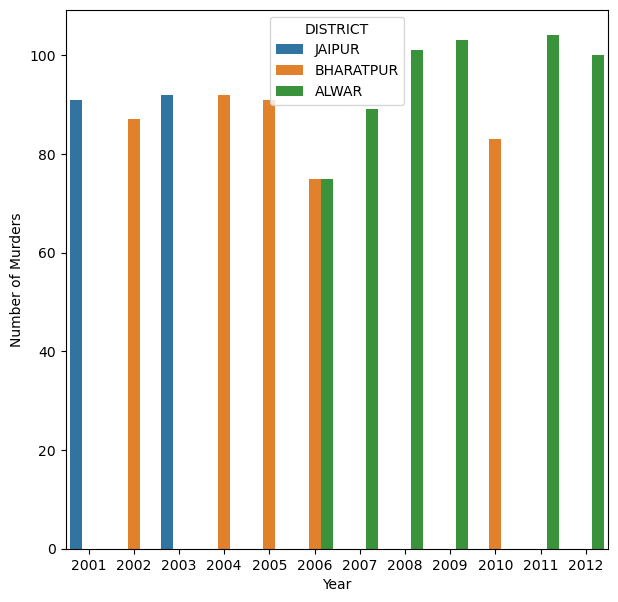

In [110]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = rajasthan,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [65]:
#Sikkim
sikkim = district_3[district_3["STATE_UT"] == 'SIKKIM']
sikkim

,STATE_UT,DISTRICT,YEAR,MURDER
23,SIKKIM,EAST,2001,13
59,SIKKIM,EAST,2002,6
95,SIKKIM,EAST,2003,7
132,SIKKIM,WEST,2004,5
171,SIKKIM,EAST,2005,5
209,SIKKIM,EAST,2006,10
245,SIKKIM,WEST,2007,6
283,SIKKIM,EAST,2008,5
319,SIKKIM,EAST,2009,7
356,SIKKIM,SOUTH,2010,7


As we can see from the above data, we see that that 'EAST SIKKIM' in the state of 'SIKKIM' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

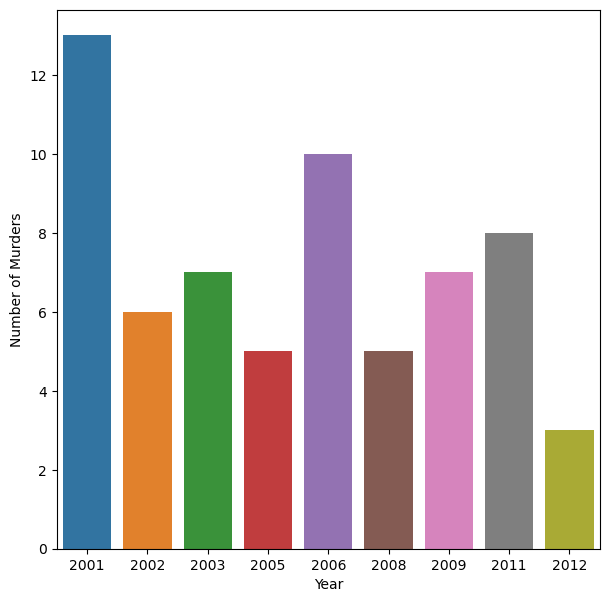

In [111]:
l = sikkim[sikkim["DISTRICT"] == 'EAST']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = l,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [66]:
#Tamil Nadu
tn = district_3[district_3["STATE_UT"] == 'TAMIL NADU']
tn

,STATE_UT,DISTRICT,YEAR,MURDER
24,TAMIL NADU,CHENNAI,2001,91
60,TAMIL NADU,DHARMAPURI,2002,94
96,TAMIL NADU,DHARMAPURI,2003,90
133,TAMIL NADU,CHENGAI,2004,79
172,TAMIL NADU,CHENNAI,2005,123
210,TAMIL NADU,CHENNAI,2006,131
246,TAMIL NADU,CHENNAI,2007,145
284,TAMIL NADU,CHENNAI,2008,100
320,TAMIL NADU,CHENNAI,2009,96
357,TAMIL NADU,CHENNAI,2010,103


As we can see from the above data, we see that the district 'CHENNAI' in the state of 'TAMIL NADU' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

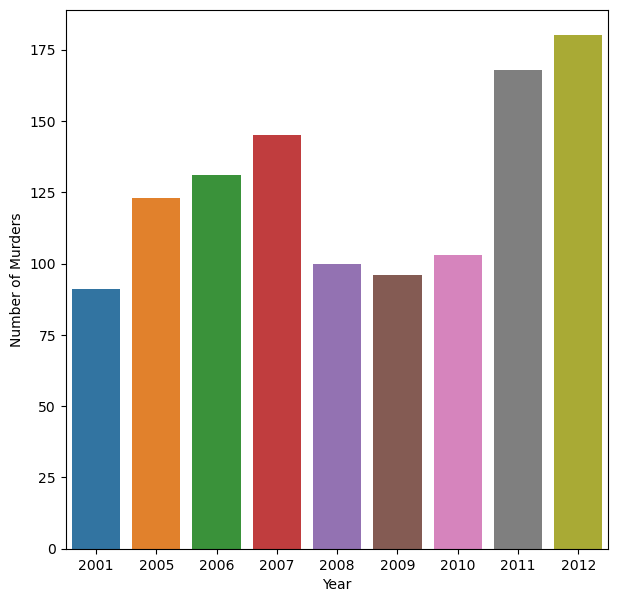

In [112]:
m = tn[tn["DISTRICT"] == 'CHENNAI']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = m,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [67]:
#Tripura
tripura = district_3[district_3["STATE_UT"] == 'TRIPURA']
tripura

,STATE_UT,DISTRICT,YEAR,MURDER
25,TRIPURA,WEST,2001,125
61,TRIPURA,WEST,2002,113
97,TRIPURA,WEST,2003,136
134,TRIPURA,WEST,2004,97
173,TRIPURA,WEST,2005,61
211,TRIPURA,WEST,2006,74
247,TRIPURA,WEST,2007,65
285,TRIPURA,WEST,2008,72
321,TRIPURA,WEST,2009,61
358,TRIPURA,WEST,2010,83


As we can see from the above data, we see that 'WEST TRIPURA' in the state of 'TRIPURA' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

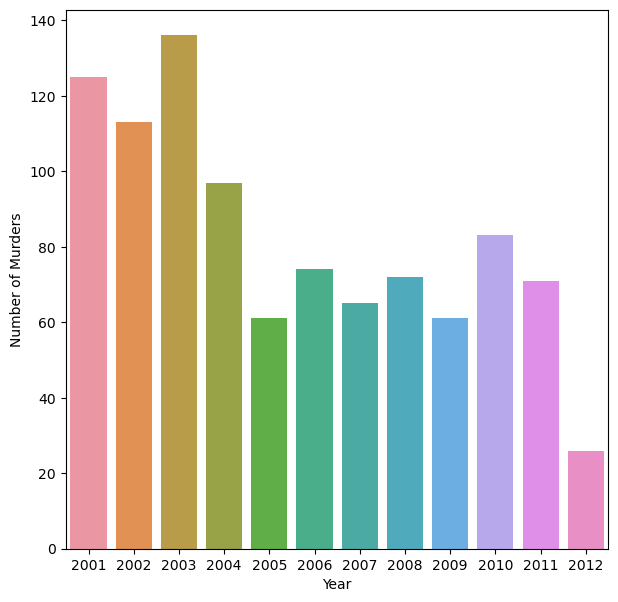

In [113]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = tripura,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [68]:
#Uttar Pradesh
up = district_3[district_3["STATE_UT"] == 'UTTAR PRADESH']
up

,STATE_UT,DISTRICT,YEAR,MURDER
26,UTTAR PRADESH,MUZAFFARNAGAR,2001,324
62,UTTAR PRADESH,MUZAFFARNAGAR,2002,287
98,UTTAR PRADESH,BAREILLY,2003,194
135,UTTAR PRADESH,MUZAFFARNAGAR,2004,253
174,UTTAR PRADESH,BAREILLY,2005,224
212,UTTAR PRADESH,MUZAFFARNAGAR,2006,230
248,UTTAR PRADESH,MUZAFFARNAGAR,2007,213
286,UTTAR PRADESH,KANPUR NAGAR,2008,168
287,UTTAR PRADESH,MUZAFFARNAGAR,2008,168
322,UTTAR PRADESH,GHAZIABAD,2009,254


As we can see from the above data, we see that the district 'MUZAFFARNAGAR' in the state of 'UTTAR PRADESH' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

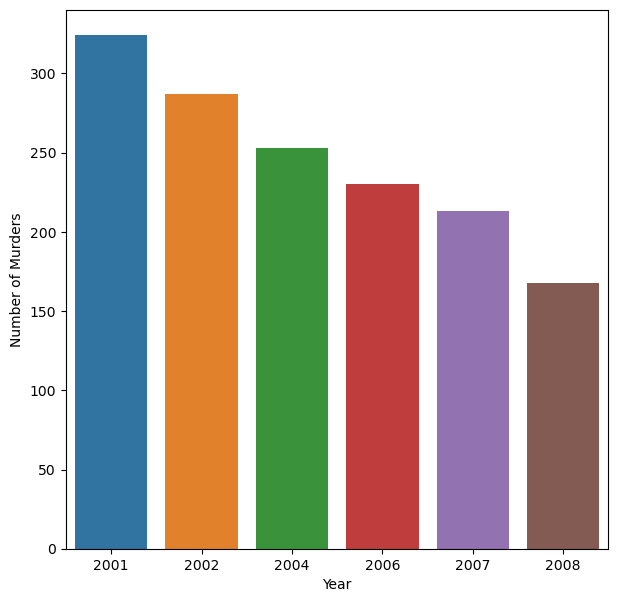

In [114]:
n = up[up["DISTRICT"] == 'MUZAFFARNAGAR']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = n,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

-- As we can see from the graph, the (murder rate) trend seems to decrease over a period of time. Therefore, it is a very good sign for 'UTTAR PRADESH'.

In [69]:
#uttarakhand
uk = district_3[district_3["STATE_UT"] == 'UTTARAKHAND']
uk

,STATE_UT,DISTRICT,YEAR,MURDER
27,UTTARAKHAND,HARIDWAR,2001,94
63,UTTARAKHAND,HARIDWAR,2002,75
99,UTTARAKHAND,HARIDWAR,2003,75
136,UTTARAKHAND,HARIDWAR,2004,56
175,UTTARAKHAND,HARIDWAR,2005,65
213,UTTARAKHAND,UDHAMSINGH NAGAR,2006,74
249,UTTARAKHAND,HARIDWAR,2007,55
288,UTTARAKHAND,HARIDWAR,2008,74
323,UTTARAKHAND,HARIDWAR,2009,67
360,UTTARAKHAND,UDHAMSINGH NAGAR,2010,55


As we can see from the above data, we see that the district 'HARIDWAR' in the state of 'UTTARAKHAND' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

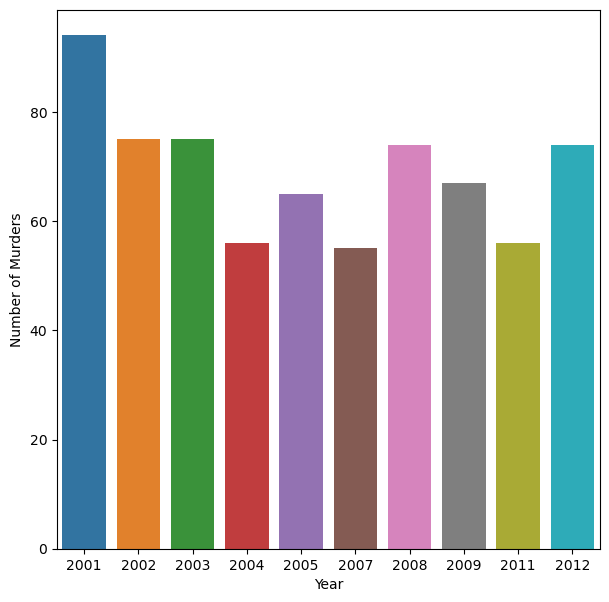

In [115]:
o = uk[uk["DISTRICT"] == 'HARIDWAR']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = o,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [70]:
#West Bengal
wb = district_3[district_3["STATE_UT"] == 'WEST BENGAL']
wb

,STATE_UT,DISTRICT,YEAR,MURDER
28,WEST BENGAL,24 PARGANAS NORTH,2001,202
64,WEST BENGAL,24 PARGANAS NORTH,2002,204
100,WEST BENGAL,24 PARGANAS NORTH,2003,193
137,WEST BENGAL,24 PARGANAS NORTH,2004,177
176,WEST BENGAL,24 PARGANAS NORTH,2005,168
214,WEST BENGAL,24 PARGANAS NORTH,2006,154
250,WEST BENGAL,24 PARGANAS NORTH,2007,194
289,WEST BENGAL,24 PARGANAS SOUTH,2008,239
324,WEST BENGAL,24 PARGANAS NORTH,2009,229
361,WEST BENGAL,PASCHIM MIDNAPUR,2010,268


As we can see from the above data, we see that the district '24 PARGANAS NORTH' and '24 PARAGANAS SOUTH' in the state of 'WEST BENGAL' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

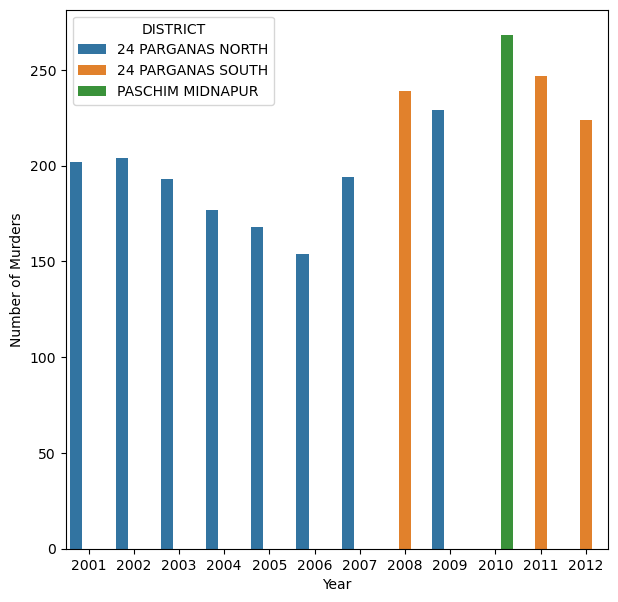

In [116]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = wb,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [71]:
#Andaman and Nicobar Islands
an = district_3[district_3["STATE_UT"] == 'A & N ISLANDS']
an

,STATE_UT,DISTRICT,YEAR,MURDER
29,A & N ISLANDS,ANDAMAN,2001,13
65,A & N ISLANDS,ANDAMAN,2002,14
101,A & N ISLANDS,ANDAMAN,2003,16
138,A & N ISLANDS,ANDAMAN,2004,13
177,A & N ISLANDS,ANDAMAN,2005,14
215,A & N ISLANDS,ANDAMAN,2006,3
251,A & N ISLANDS,A and N ISLANDS,2007,15
290,A & N ISLANDS,ANDAMAN,2008,8
325,A & N ISLANDS,ANDAMAN,2009,15
362,A & N ISLANDS,ANDAMAN,2010,8


As we can see from the above data, we see that the district 'ANDAMAN' in the UT of 'ANDAMAN & NICOBAR ISLANDS' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

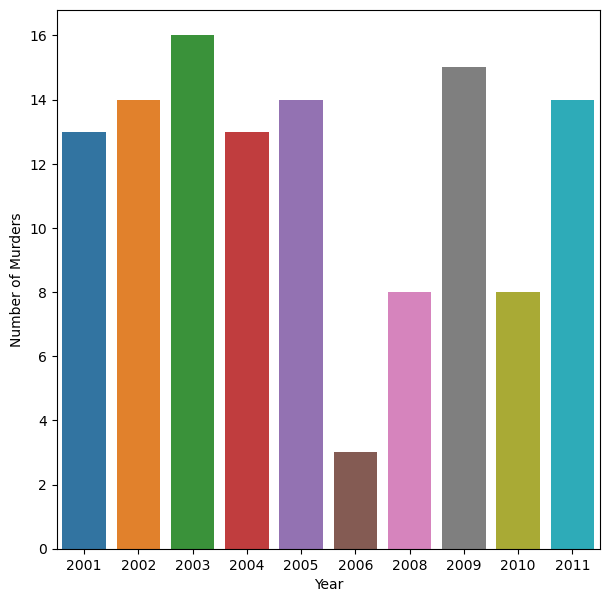

In [118]:
p = an[an["DISTRICT"] == 'ANDAMAN']
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = p,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [72]:
#Chandigarh
ch = district_3[district_3["STATE_UT"] == 'CHANDIGARH']
ch

,STATE_UT,DISTRICT,YEAR,MURDER
30,CHANDIGARH,CHANDIGARH,2001,15
66,CHANDIGARH,CHANDIGARH,2002,31
102,CHANDIGARH,CHANDIGARH,2003,21
139,CHANDIGARH,CHANDIGARH,2004,22
178,CHANDIGARH,CHANDIGARH,2005,18
216,CHANDIGARH,CHANDIGARH,2006,12
252,CHANDIGARH,CHANDIGARH,2007,19
291,CHANDIGARH,CHANDIGARH,2008,17
326,CHANDIGARH,CHANDIGARH,2009,22
363,CHANDIGARH,CHANDIGARH,2010,21


Text(0, 0.5, 'Number of Murders')

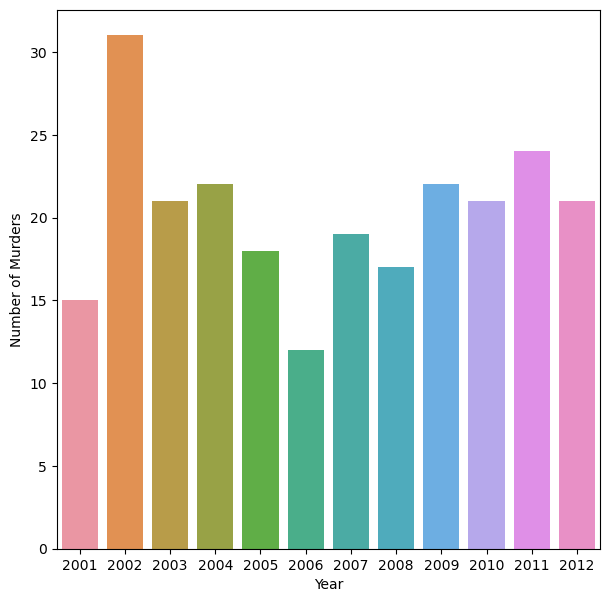

In [119]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = ch,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [73]:
#D and N Haveli
dn = district_3[district_3["STATE_UT"] == 'D & N HAVELI']
dn

,STATE_UT,DISTRICT,YEAR,MURDER
31,D & N HAVELI,D and N HAVELI,2001,3
67,D & N HAVELI,D and N HAVELI,2002,11
103,D & N HAVELI,D and N HAVELI,2003,11
140,D & N HAVELI,D and N HAVELI,2004,11
179,D & N HAVELI,D and N HAVELI,2005,7
217,D & N HAVELI,D and N HAVELI,2006,9
253,D & N HAVELI,D and N HAVELI,2007,10
292,D & N HAVELI,D and N HAVELI,2008,9
327,D & N HAVELI,D and N HAVELI,2009,10
364,D & N HAVELI,D and N HAVELI,2010,6


Text(0, 0.5, 'Number of Murders')

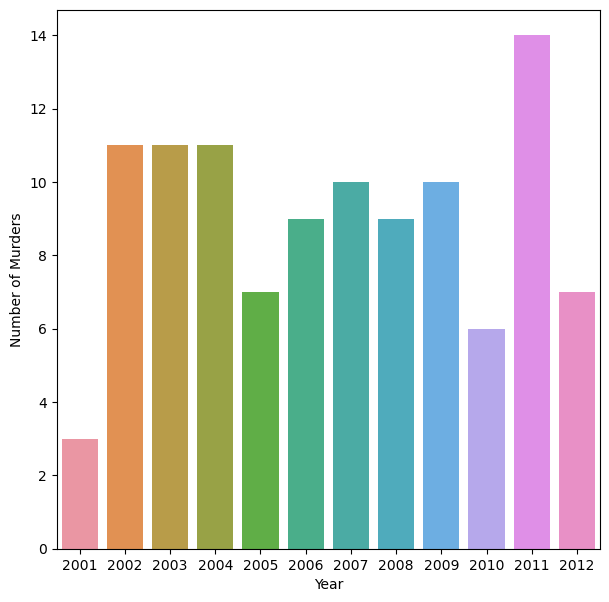

In [120]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = dn,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [74]:
#Daman and DIu
dd = district_3[district_3["STATE_UT"] == 'DAMAN & DIU']
dd

,STATE_UT,DISTRICT,YEAR,MURDER
32,DAMAN & DIU,DAMAN,2001,6
68,DAMAN & DIU,DAMAN,2002,7
104,DAMAN & DIU,DAMAN,2003,6
141,DAMAN & DIU,DAMAN,2004,2
180,DAMAN & DIU,DAMAN,2005,4
218,DAMAN & DIU,DAMAN,2006,6
254,DAMAN & DIU,DAMAN,2007,12
293,DAMAN & DIU,DAMAN,2008,2
328,DAMAN & DIU,DAMAN,2009,5
365,DAMAN & DIU,DAMAN,2010,5


As we can see from the above data, we see that the district 'DAMAN' in the UT of 'DAMAN & DIU' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

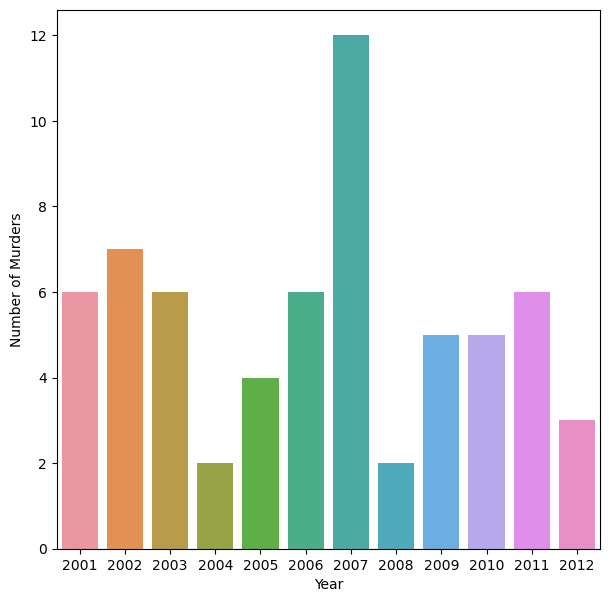

In [121]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = dd,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [76]:
#Delhi
delhi = district_3[district_3["STATE_UT"] == 'DELHI UT']
delhi

,STATE_UT,DISTRICT,YEAR,MURDER
33,DELHI UT,NORTH WEST,2001,134
69,DELHI UT,NORTH WEST,2002,135
105,DELHI UT,NORTH WEST,2003,106
142,DELHI UT,NORTH WEST,2004,129
181,DELHI UT,NORTH-WEST,2005,128
219,DELHI UT,NORTH-WEST,2006,128
255,DELHI UT,OUTER,2007,102
294,DELHI UT,NORTH-EAST,2008,92
329,DELHI UT,NORTH-EAST,2009,74
330,DELHI UT,OUTER,2009,74


As we can see from the above data, we see that 'OUTER DELHI' and 'NORTH-WEST DELHI' in the UT of 'DELHI' has maximum amount of murders for more than 3 years in a row.

Text(0, 0.5, 'Number of Murders')

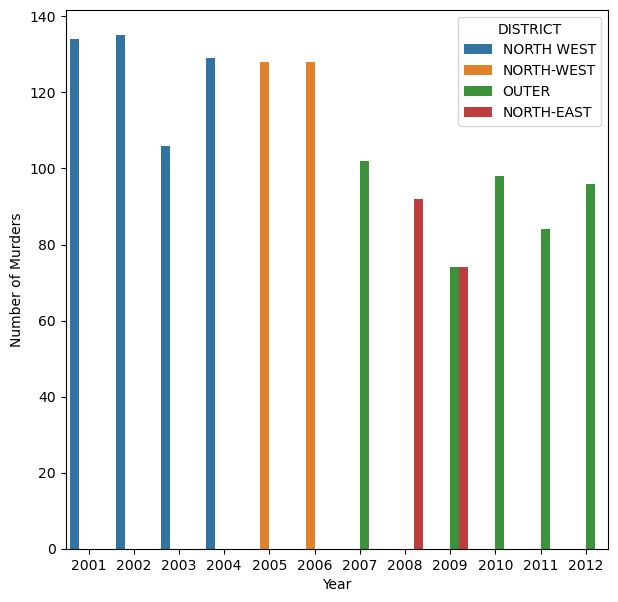

In [123]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = delhi,hue = 'DISTRICT',errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [125]:
#Lakshadweep
la = district_3[district_3["STATE_UT"] == 'LAKSHADWEEP']
la

,STATE_UT,DISTRICT,YEAR,MURDER
34,LAKSHADWEEP,LAKSHADWEEP,2001,1
70,LAKSHADWEEP,LAKSHADWEEP,2002,0
106,LAKSHADWEEP,LAKSHADWEEP,2003,0
143,LAKSHADWEEP,LAKSHADWEEP,2004,0
182,LAKSHADWEEP,LAKSHADWEEP,2005,1
220,LAKSHADWEEP,LAKSHADWEEP,2006,0
256,LAKSHADWEEP,LAKSHADWEEP,2007,0
295,LAKSHADWEEP,LAKSHADWEEP,2008,1
331,LAKSHADWEEP,LAKSHADWEEP,2009,0
367,LAKSHADWEEP,LAKSHADWEEP,2010,0


Text(0, 0.5, 'Number of Murders')

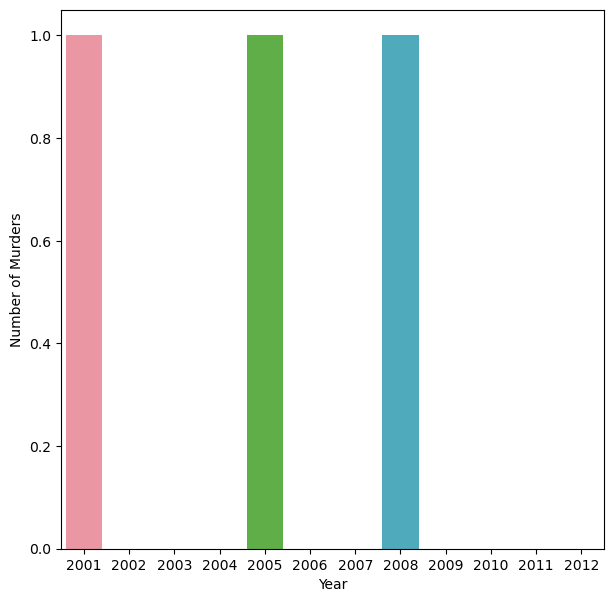

In [126]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = la,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')

In [78]:
#Puducherry
py = district_3[district_3["STATE_UT"] == 'PUDUCHERRY']
py

,STATE_UT,DISTRICT,YEAR,MURDER
35,PUDUCHERRY,PONDICHERRY,2001,25
71,PUDUCHERRY,PONDICHERRY,2002,29
107,PUDUCHERRY,PONDICHERRY,2003,29
144,PUDUCHERRY,PONDICHERRY,2004,25
183,PUDUCHERRY,PONDICHERRY,2005,19
221,PUDUCHERRY,PONDICHERRY,2006,28
257,PUDUCHERRY,PONDICHERRY,2007,30
296,PUDUCHERRY,PUDUCHERRY,2008,30
332,PUDUCHERRY,PUDUCHERRY,2009,31
368,PUDUCHERRY,PUDUCHERRY,2010,29


Text(0, 0.5, 'Number of Murders')

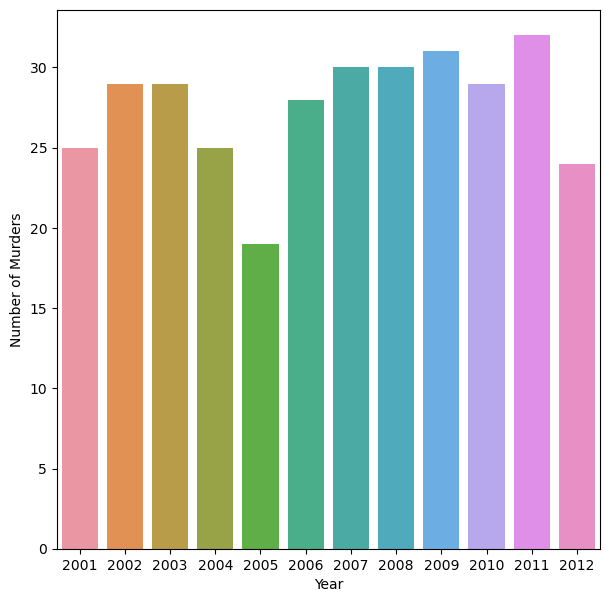

In [127]:
plt.figure(figsize = (7,7))
sns.barplot(x='YEAR' , y = 'MURDER',data = py,errorbar = None)
plt.xlabel('Year')
plt.ylabel('Number of Murders')